In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')

In [4]:
df = dataset['train'].to_pandas()

In [5]:
df['job_posted_date'] = pd.to_datetime((df['job_posted_date']))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [8]:
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [13]:
df.sort_values(by='job_posted_date',ascending=False)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
90102,Machine Learning Engineer,Intelligence analyst,"Boston, MA",via Talent.com,Full-time,False,"New York, United States",2023-12-31 23:59:58,True,False,United States,None,NaN,NaN,VirtualVocations,None,None
112373,Senior Data Analyst,Marketing Data & Analytics Product Owner - Sen...,"Boston, MA (+1 other)",via Boston Consulting Group,Full-time,False,"New York, United States",2023-12-31 23:59:58,False,False,United States,None,NaN,NaN,Boston Consulting Group,"['sql', 'python', 'r', 'gdpr', 'tableau', 'pow...","{'analyst_tools': ['tableau', 'power bi'], 'li..."
327439,Data Engineer,Staff engineer data,"Southfield, MI",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:32,False,False,Sudan,year,140000.0,NaN,Credit Acceptance,"['express', 'kubernetes']","{'other': ['kubernetes'], 'webframeworks': ['e..."
362129,Data Engineer,Data engineer,"Sunnyvale, CA",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:31,True,False,Sudan,None,NaN,NaN,ITCO Solutions,"['sql', 'python', 'java', 'snowflake', 'airflo...","{'cloud': ['snowflake'], 'libraries': ['airflo..."
351830,Data Engineer,Data engineer,"San Francisco, CA",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:31,False,False,Sudan,None,NaN,NaN,JBL Resources,"['azure', 'power bi', 'word']","{'analyst_tools': ['power bi', 'word'], 'cloud..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72158,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",2023-01-01 00:00:27,False,True,United States,None,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p..."
110290,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:24,False,False,United States,None,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}"
98438,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:22,False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
96906,Data Analyst,Data Analyst,"Bloomfield, CT",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:07,True,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'sas', 'sas']","{'analyst_tools': ['sas'], 'programming': ['sq..."


In [17]:
df.loc[0:100,'salary_rate':'salary_hour_avg'].dropna(subset=['salary_rate','salary_hour_avg'])

,salary_rate,salary_year_avg,salary_hour_avg
43,hour,NaN,97.5
51,hour,NaN,72.5


## Data Cleaning ###

In [24]:
median_salary_year = df['salary_year_avg'].median()
median_salary_hour = df['salary_hour_avg'].median()

df_filled = df


df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [25]:
df_filled.loc[:10,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


### Drop Duplicates

In [27]:
df_unique = df_filled

df_unique = df_unique.drop_duplicates()

print(f"Length of original df : {len(df_filled)}")
print(f'Length of drop duplicates df: {len(df_unique)}')
print(f'Roes Dropped:{len(df_filled) - len(df_unique)}')

Length of original df : 785741
Length of drop duplicates df: 785640
Roes Dropped:101


In [28]:
df_unique.loc[0:20]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,115000.0,45.98,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,115000.0,45.98,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,115000.0,45.98,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,115000.0,45.98,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,115000.0,45.98,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,115000.0,45.98,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,115000.0,45.98,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [29]:

df_unique = df_unique.drop_duplicates(subset=['job_title','company_name'])

print(f"Length of original df : {len(df_filled)}")
print(f'Length of drop duplicates df: {len(df_unique)}')
print(f'Roes Dropped:{len(df_filled) - len(df_unique)}')

Length of original df : 785741
Length of drop duplicates df: 508042
Roes Dropped:277699


### Data Management

In [31]:
df.tail(20)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
785721,Business Analyst,IT Business Analyst Data,Jerman,melalui Indeed,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,Raisin,"['sql', 'python', 'aws', 'looker', 'tableau', ...","{'analyst_tools': ['looker', 'tableau', 'splun..."
785722,Business Analyst,Business Analytics Training and Internship,Jerman,melalui LinkedIn,None,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,OESON,['python'],{'programming': ['python']}
785723,Data Engineer,Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,115000.0,45.98,ON,"['sql', 'python', 'looker']","{'analyst_tools': ['looker'], 'programming': [..."
785724,Data Engineer,Junior Consultant Data Engineering,"Koln, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,115000.0,45.98,Target Reply,None,None
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,Planet,"['sql', 'bigquery', 'gdpr', 'git', 'gitlab', '...","{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785726,Data Engineer,OT Data Engineer,"Basel, Swiss",melalui BeBee Schweiz,Pekerjaan tetap,False,Switzerland,2023-03-12 06:37:21,False,False,Switzerland,None,115000.0,45.98,Proclinical Staffing,"['python', 'r', 'java']","{'programming': ['python', 'r', 'java']}"
785727,Data Engineer,Data engineer (H/F),"Jenewa, Swiss",melalui LinkedIn,Pekerjaan tetap,False,Switzerland,2023-03-12 06:37:21,False,False,Switzerland,None,115000.0,45.98,ROLEX,"['python', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
785728,Senior Data Scientist,"Senior Data Scientist, Operations Research",Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,Wolt Oy,"['python', 'sql']","{'programming': ['python', 'sql']}"
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,IU Internationale Hochschule,None,None
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,115000.0,45.98,Amazon Web Services (AWS),"['excel', 'word', 'outlook']","{'analyst_tools': ['excel', 'word', 'outlook']}"


In [33]:
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
764564,Data Analyst,Data Analyst,"Leeds, UK",via Monster.co.uk,Full-time,False,United Kingdom,2023-01-25 20:50:35,True,False,United Kingdom,None,115000.0,45.98,Markel Corporation,"['sql', 't-sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':..."
271134,Data Engineer,Sr. Data Engineer,"Chantilly, VA",via Buchanan & Edwards - ICIMS,Full-time,False,Georgia,2023-03-03 07:46:05,False,False,United States,None,115000.0,45.98,Buchanan & Edwards,"['scala', 'python', 'java', 'nosql', 'elastics...","{'analyst_tools': ['excel'], 'cloud': ['databr..."
645043,Data Analyst,Data Analyst,"Boca Raton, FL",via JobServe,Full-time,False,"Florida, United States",2023-08-29 12:04:34,False,True,United States,None,115000.0,45.98,Blue Team LLC,"['sql', 'nosql', 'r', 'python', 'excel', 'powe...","{'analyst_tools': ['excel', 'power bi'], 'prog..."
445112,Data Analyst,Data Analyst (w/m/d),"Frankfurt, Germany",via Indeed,Full-time,False,Germany,2023-02-01 16:59:28,True,False,Germany,None,115000.0,45.98,T-Systems International GmbH,"['python', 'pandas']","{'libraries': ['pandas'], 'programming': ['pyt..."
665767,Business Analyst,Quality Management Engineer,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-03-11 10:14:50,True,False,Poland,None,115000.0,45.98,AVL,None,None
197677,Data Scientist,[LU] Junior Data Scientist,Luxembourg,via LinkedIn Luxembourg,Full-time,False,Luxembourg,2023-03-23 16:11:32,False,False,Luxembourg,None,115000.0,45.98,Huxley Luxembourg,"['java', 'php', 'python', 'sql', 'nosql']","{'programming': ['java', 'php', 'python', 'sql..."
49208,Data Engineer,Data Engineer,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-07-30 06:34:21,True,False,Argentina,None,115000.0,45.98,Emprego,"['sql', 't-sql', 'c#', 'python', 'scala', 'azu...","{'analyst_tools': ['ssis'], 'cloud': ['azure']..."
730035,Data Engineer,Data Engineer/Analyst,"New York, NY",via KHON2 Jobs,Full-time,False,Georgia,2023-02-12 21:56:25,False,True,United States,None,115000.0,45.98,Emerest Connect,"['sql', 'python', 'aws', 'redshift', 'snowflak...","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
404331,Machine Learning Engineer,Formation Machine Learning Engineer,"Montrouge, France",via BeBee,Temp work,False,France,2023-11-25 18:13:09,False,False,France,None,115000.0,45.98,Joblift,None,None
743616,Data Engineer,Data Engineer Jobs,"McLean, VA",via Clearance Jobs,Full-time,False,Georgia,2023-01-26 20:50:33,False,False,United States,None,115000.0,45.98,Leidos,"['sql', 'java', 'aws', 'databricks', 'hadoop']","{'cloud': ['aws', 'databricks'], 'libraries': ..."


In [34]:
id(df)

2099736344176

In [35]:
id(df_unique)

2098227497616

In [39]:
id(df_filled) == id(df)

True

In [40]:
id(df_unique) == id(df_filled)

False

In [41]:
df_copy = df.copy()

In [42]:
id(df_copy)

2098093096528

### Pivot Table

In [43]:
df.pivot_table(index='job_title_short',aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [44]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [50]:
df.pivot_table(values='salary_year_avg',index='job_title_short',aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,115000.0
Cloud Engineer,115000.0
Data Analyst,115000.0
Data Engineer,115000.0
Data Scientist,115000.0
Machine Learning Engineer,115000.0
Senior Data Analyst,115000.0
Senior Data Engineer,115000.0
Senior Data Scientist,115000.0


In [51]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst             115000.0
Cloud Engineer               115000.0
Data Analyst                 115000.0
Data Engineer                115000.0
Data Scientist               115000.0
Machine Learning Engineer    115000.0
Senior Data Analyst          115000.0
Senior Data Engineer         115000.0
Senior Data Scientist        115000.0
Software Engineer            115000.0
Name: salary_year_avg, dtype: float64

In [54]:
df.pivot_table(index='job_country',values='salary_year_avg',columns='job_title_short',aggfunc='median')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,115000.0,NaN,115000.0,NaN,115000.0,NaN,115000.0,NaN,NaN,NaN
Albania,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Algeria,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,NaN,115000.0
Angola,115000.0,NaN,115000.0,115000.0,115000.0,NaN,NaN,NaN,115000.0,115000.0
Argentina,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Vietnam,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Yemen,115000.0,NaN,115000.0,115000.0,NaN,NaN,NaN,NaN,NaN,115000.0


In [64]:
top_countries = df['job_country'].value_counts().head(10).index

In [65]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

In [66]:
df_job_country_salary = df_job_country_salary.loc[top_countries]

In [67]:
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
India,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
United Kingdom,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
France,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Germany,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Spain,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Singapore,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Sudan,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Netherlands,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0


In [68]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

In [69]:
df_job_country_salary = df_job_country_salary[job_titles]

In [70]:
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,115000.0,115000.0,115000.0
India,115000.0,115000.0,115000.0
United Kingdom,115000.0,115000.0,115000.0
France,115000.0,115000.0,115000.0
Germany,115000.0,115000.0,115000.0
Spain,115000.0,115000.0,115000.0
Singapore,115000.0,115000.0,115000.0
Sudan,115000.0,115000.0,115000.0
Netherlands,115000.0,115000.0,115000.0


<Axes: xlabel='job_country'>

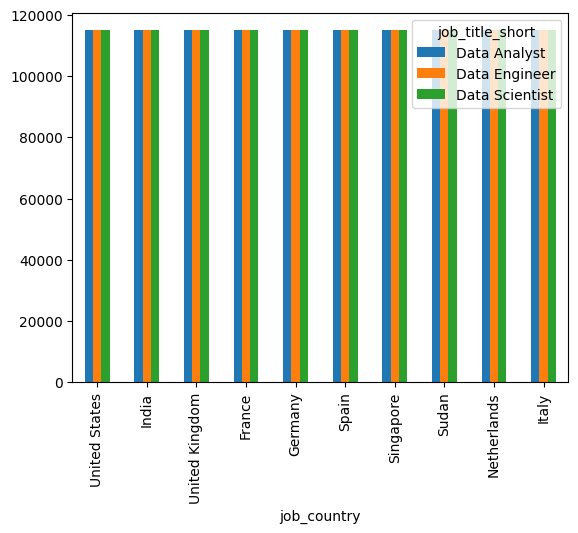

In [71]:
df_job_country_salary.plot(kind='bar')

### Index Management

In [78]:
df = dataset['train'].to_pandas()

In [77]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [79]:
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
318491,Business Analyst,Marketing Intelligence Analyst,Thailand,via หางาน | Indeed,Full-time,False,Thailand,2023-10-01 17:18:14,False,False,Thailand,None,NaN,NaN,บริษัท เดอะคลีนิกค์ คลินิกเวชกรรม จำกัด (มหาชน),"['excel', 'power bi']","{'analyst_tools': ['excel', 'power bi']}"
394629,Data Analyst,Data Analyst Engineer for new technology appli...,"Leuven, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-06-20 18:29:31,False,False,Belgium,None,NaN,NaN,Leuven MindGate,"['r', 'java', 'c#', 'c++', 'go', 'scikit-learn...","{'libraries': ['scikit-learn', 'tensorflow'], ..."
611533,Data Analyst,Data analyst en alternance H/F,"Areines, France","via Jobs, Stages… - L'Etudiant",Full-time,False,France,2023-03-03 12:28:08,False,False,France,None,NaN,NaN,FITECO,None,None
508197,Data Engineer,Lead Data Engineer,"Beaverton, OR",via ZipRecruiter,Full-time,False,"California, United States",2023-02-11 11:10:14,False,False,United States,None,NaN,NaN,Nike,"['sql', 'python', 'scala', 'java', 'nosql', 'd...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
245253,Machine Learning Engineer,Engineer,"Mexico City, CDMX, Mexico",via BeBee,Full-time,False,Mexico,2023-09-02 08:05:58,True,False,Mexico,None,NaN,NaN,YAZAKI Corporation,None,None
46841,Data Analyst,Merlin / QPS Data Analyst | Noida Area/Remote,India,via Shine,Full-time,False,India,2023-11-23 06:13:35,False,False,India,None,NaN,NaN,Savanta,"['vba', 'spss', 'excel']","{'analyst_tools': ['spss', 'excel'], 'programm..."
89380,Data Engineer,Big Data Engineer - PySpark,"Houston, TX",via Mendeley,Full-time,False,"Florida, United States",2023-01-28 00:12:06,True,False,United States,None,NaN,NaN,Logic20/20 Inc.,"['go', 'outlook']","{'analyst_tools': ['outlook'], 'programming': ..."
633636,Data Scientist,Data Scientist,"Bucharest, Romania",via LinkedIn,Full-time,False,Romania,2023-02-01 13:05:10,False,False,Romania,None,NaN,NaN,IBM,"['python', 'r', 'sql', 'ibm cloud', 'pyspark']","{'cloud': ['ibm cloud'], 'libraries': ['pyspar..."
215432,Data Engineer,Data Engineer (M/W/D),"Dresden, Germany",via LinkedIn,Full-time,False,Germany,2023-08-27 22:21:25,True,False,Germany,None,NaN,NaN,GTV - Gesellschaft für Technische Visualistik...,"['python', 'java', 'sql', 'nosql']","{'programming': ['python', 'java', 'sql', 'nos..."
708526,Software Engineer,MS Engineer,"South Jakarta, South Jakarta City, Jakarta, In...",via BeBee,Full-time,False,Indonesia,2023-08-20 02:17:29,True,False,Indonesia,None,NaN,NaN,"NTT Ltd., NTT","['python', 'perl']","{'programming': ['python', 'perl']}"


In [80]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [82]:
df.index.name = 'job_index'

In [83]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [84]:
df.index.dtype

dtype('int64')

### Three Index method

df.reset_index() 
df.set_index() 
df.sort_index()

In [86]:
df_india = df[df['job_country']=='India']

In [88]:
df_india.reset_index(inplace=True)

In [92]:
df_india.tail()

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
51083,785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
51084,785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
51085,785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
51086,785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
51087,785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,"['aws', 'flow']","{'cloud': ['aws'], 'other': ['flow']}"


In [94]:
df_india.set_index('job_index',inplace=True)

In [95]:
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"


In [96]:
median_pivot = df_india.pivot_table(values='salary_year_avg',index='job_title_short',aggfunc=['median','min','max'])

In [97]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,64800.0,43200.0,142025.0
Data Analyst,100500.0,32400.0,650000.0
Data Engineer,147500.0,43200.0,249000.0
Data Scientist,114008.0,43200.0,204381.0
Machine Learning Engineer,79200.0,32500.0,267000.0
Senior Data Analyst,111175.0,64800.0,177283.0
Senior Data Engineer,147500.0,35000.0,181765.0
Senior Data Scientist,149653.0,64800.0,170575.0


In [99]:
median_pivot = median_pivot.sort_values(by=('median','salary_year_avg'),ascending=False)

In [100]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,149653.0,64800.0,170575.0
Senior Data Engineer,147500.0,35000.0,181765.0
Data Engineer,147500.0,43200.0,249000.0
Data Scientist,114008.0,43200.0,204381.0
Senior Data Analyst,111175.0,64800.0,177283.0
Data Analyst,100500.0,32400.0,650000.0
Machine Learning Engineer,79200.0,32500.0,267000.0
Software Engineer,79200.0,44418.5,200000.0


In [102]:
median_pivot.sort_index(inplace=True)

In [103]:
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,64800.0,43200.0,142025.0
Data Analyst,100500.0,32400.0,650000.0
Data Engineer,147500.0,43200.0,249000.0
Data Scientist,114008.0,43200.0,204381.0
Machine Learning Engineer,79200.0,32500.0,267000.0
Senior Data Analyst,111175.0,64800.0,177283.0
Senior Data Engineer,147500.0,35000.0,181765.0
Senior Data Scientist,149653.0,64800.0,170575.0


<Axes: xlabel='job_title_short'>

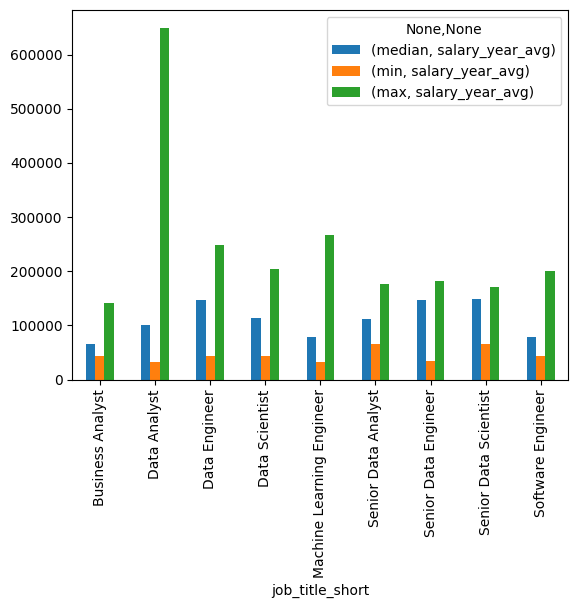

In [104]:
median_pivot.plot(kind='bar')

In [7]:
df_usa = df[df['job_country'] == 'United States'].copy()


In [115]:
df_usa['job_posted_date'] =  pd.to_datetime((df_usa['job_posted_date']))

In [8]:
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

In [9]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [11]:
df_usa_pivot.reset_index(inplace=True)

In [12]:
df_usa_pivot

job_title_short,index,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,2,December,648,40,3979,2641,3472,119,601,689,752,212
3,3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,8,May,279,20,4993,2976,4377,49,839,746,914,90
9,9,November,719,36,4531,2793,4175,132,656,684,816,194


In [23]:
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'],format='%B').dt.month

In [24]:
df_usa_pivot.sort_values('month_no',inplace=True)

In [25]:
df_usa_pivot.set_index('job_posted_month',inplace=True)

In [33]:
df_usa_pivot.drop(columns='month_no',inplace=True)

KeyError: "['month_no'] not found in axis"

In [36]:
df_usa_pivot.drop(columns='index',inplace=True)

In [37]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

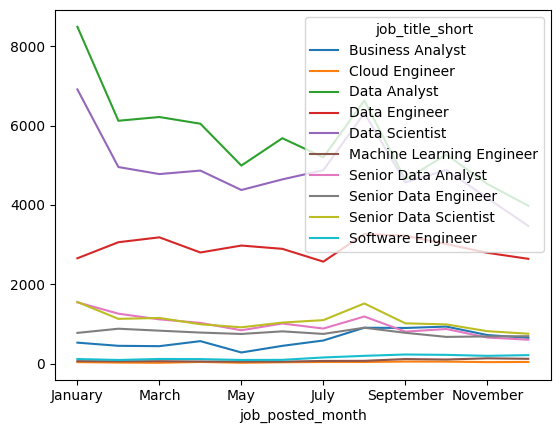

In [38]:
df_usa_pivot.plot(kind='line')

In [39]:
top_3 = df_usa['job_title_short'].value_counts().head(3)

In [42]:
top_3.index

Index(['Data Analyst', 'Data Scientist', 'Data Engineer'], dtype='object', name='job_title_short')

In [45]:
top_3 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

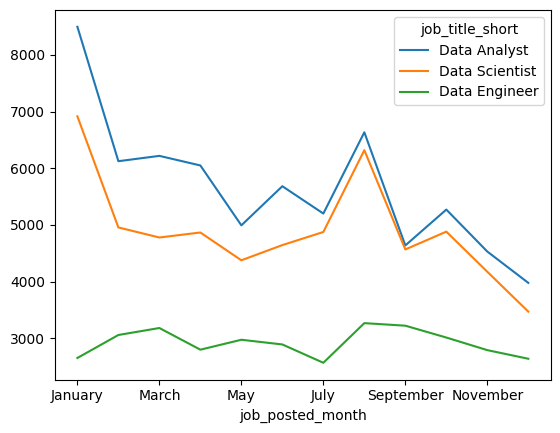

In [46]:
df_usa_pivot[top_3].plot(kind='line')

In [47]:
full_stack_posting = pd.read_csv('https://lukeb.co/software_csv')

In [ ]:
full_stack_posting

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [50]:
full_stack_posting.set_index('job_posted_month',inplace=True)

In [51]:
full_stack_posting

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [53]:
job_merge = df_usa_pivot.merge(full_stack_posting,on='job_posted_month')

<Axes: xlabel='job_posted_month'>

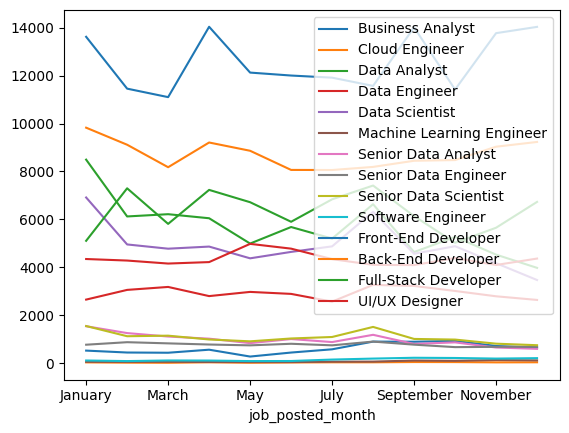

In [54]:
job_merge.plot(kind='line')

In [55]:
top_5 = job_merge.sum().sort_values(ascending=False).head().index.to_list()

In [56]:
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: xlabel='job_posted_month'>

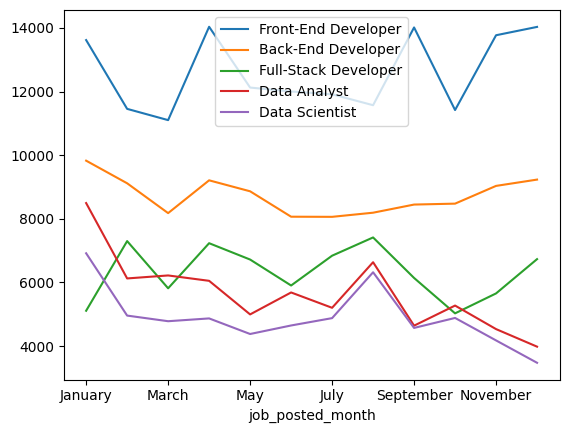

In [57]:
job_merge[top_5].plot(kind='line')

In [66]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

In [67]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug


In [68]:
months = df['job_posted_month'].unique()

In [72]:
dict_months = {month:df[df['job_posted_month']==month] for month in months}

In [73]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


In [76]:
df_q1 = pd.concat([dict_months['Jan'],dict_months['Feb'],dict_months['Mar']],ignore_index=True)

<Axes: xlabel='job_posted_month'>

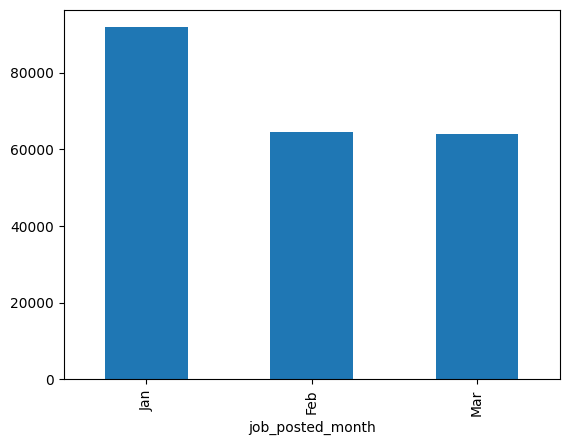

In [77]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

### Exporting Dataframes

In [78]:
df_q1.head().to_clipboard(sep=",")

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,,,,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,,,,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark']","{'libraries': ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark'], 'programming': ['r', 'python', 'sql']}",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,,,,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,,,,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws'], 'programming': ['sql', 'python']}",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,,,,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python', 'sql']}",Jan


In [80]:
df_q1.to_csv('quater_1.csv')

In [82]:
df_q1.to_excel('quater_1.xlsx')

In [83]:
help(df.apply)

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None, args=(), by_row: "Literal[False, 'compat']" = 'compat', engine: "Literal['python', 'numba']" = 'python', engine_kwargs: 'dict[str, bool] | None' = None, **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
 

In [89]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()
def projected_salary(salary):
    return salary * 1.03

In [90]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

In [91]:
df_salary[['salary_year_avg','salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [93]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary*1.03)

In [94]:
df_salary[['salary_year_avg','salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [101]:
df['job_skills'][1]

"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']"

In [103]:
import ast

type(ast.literal_eval(df['job_skills'][1]))

list

In [105]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [107]:
type(df['job_skills'][1])

list

In [113]:

df['job_type_skills'] = df['job_type_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else []
    )

In [114]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,[],Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug


In [120]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

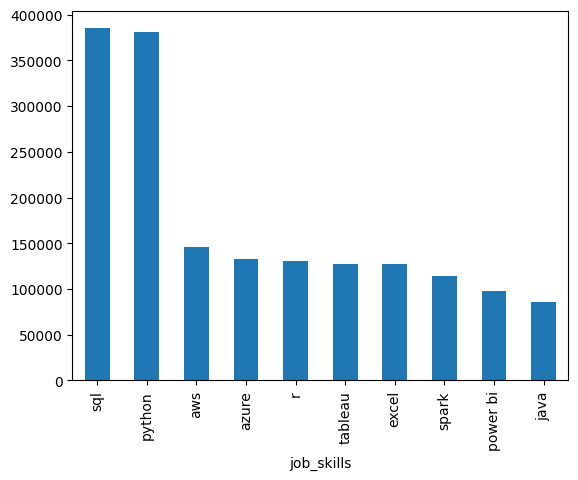

In [ ]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [131]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [132]:
type(skills_count)

pandas.core.series.Series

In [143]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values('skill_count',ascending=False)

In [144]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [145]:
job_title = 'Data Analyst'
top_skills= 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)

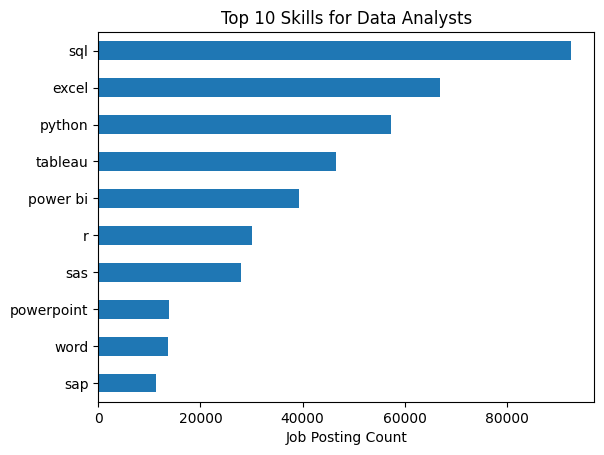

In [150]:
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()